In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from s_dbw import S_Dbw
import math

In [31]:
# resets index after selections have been made
def resetindex(data):
    data=data.reset_index()
    data=data.drop('index', axis=1)
    return data

In [32]:
#reduces the data set to the first m iterations
def firstiterations(m,data):
    i=0
    j=0
    n=len(data.index)    
    while i<n:
        if  (data.iat[j,10]>m):
            data=data.drop(i, axis=0)
            i=i+1
        else:
            i=i+1
            j=j+1
    data=resetindex(data)
    return data

In [33]:
beta=1e5
points=33

In [34]:
df=pd.read_csv(f'BayesOpt1e{int(math.log10(beta))}.txt', sep='\t')
df=df.drop_duplicates()
df

,Resnorm,Droptol,Fillfactor
0,-0.000000e+00,1.000000e-12,9.0
1,-0.000000e+00,1.000000e-04,9.0
2,-5.936780e+03,1.000000e+04,9.0
3,-6.570580e-14,1.000000e-12,4.0
4,-2.764280e-15,1.000000e-04,4.0
...,...,...,...
157,-3.923780e+00,1.000000e-10,2.0
201,-1.000570e+04,1.000000e-04,1.0
205,-1.079310e+04,1.000000e-06,1.0
207,-5.936780e+03,1.000000e+04,7.0


In [35]:
df=resetindex(df)
df

,Resnorm,Droptol,Fillfactor
0,-0.000000e+00,1.000000e-12,9.0
1,-0.000000e+00,1.000000e-04,9.0
2,-5.936780e+03,1.000000e+04,9.0
3,-6.570580e-14,1.000000e-12,4.0
4,-2.764280e-15,1.000000e-04,4.0
...,...,...,...
67,-3.923780e+00,1.000000e-10,2.0
68,-1.000570e+04,1.000000e-04,1.0
69,-1.079310e+04,1.000000e-06,1.0
70,-5.936780e+03,1.000000e+04,7.0


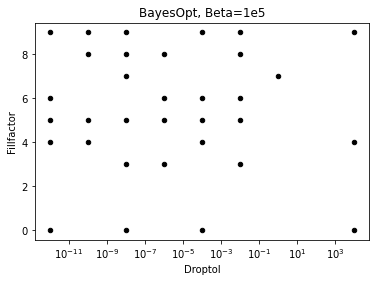

In [36]:
ax = (df[0:points]).plot(kind='scatter', x='Droptol', y='Fillfactor',color='black');

ax.set_xscale('log')
plt.title(f"BayesOpt, Beta=1e{int(math.log10(beta))}")
plt.show()

In [37]:
dfbeta=pd.read_csv('PCGDim16129.txt', sep='\t')
dfbeta=dfbeta.drop('Convergence Mode', axis=1)

dfBeta=dfbeta.query(f"Beta=={beta}")
dfBeta=resetindex(dfBeta)

In [38]:
dfBeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24633 entries, 0 to 24632
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ILUTNonzeros         24633 non-null  int64  
 1   Number of unknowns   24633 non-null  int64  
 2   Alpha                24633 non-null  int64  
 3   Beta                 24633 non-null  float64
 4   Droptol              24633 non-null  float64
 5   Fillfactor           24633 non-null  int64  
 6   Tolerance            24633 non-null  float64
 7   InitialResidualNorm  24633 non-null  float64
 8   ResidualNorm         24633 non-null  float64
 9   ResidualQuotient     24633 non-null  float64
 10  Iterations           24633 non-null  int64  
 11  SolutionTime         24633 non-null  float64
 12  ILUAssemblyTime      24633 non-null  float64
 13  AbsoluteError        24633 non-null  float64
 14  RelativeError        24633 non-null  float64
dtypes: float64(10), int64(5)
memory usag

In [39]:
test=dfBeta[["ILUTNonzeros","Droptol","Fillfactor"]]
test=test.drop_duplicates()
test=resetindex(test)
test

,ILUTNonzeros,Droptol,Fillfactor
0,16129,1.000000e-12,0
1,53447,1.000000e-12,1
2,124427,1.000000e-12,2
3,158549,1.000000e-12,3
4,198002,1.000000e-12,4
...,...,...,...
85,16129,1.000000e+04,5
86,16129,1.000000e+04,6
87,16129,1.000000e+04,7
88,16129,1.000000e+04,8


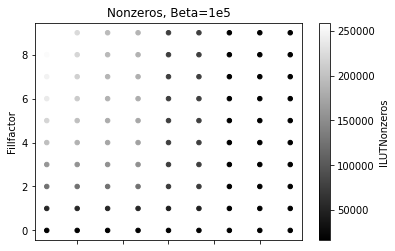

In [40]:
ax = test.plot(kind='scatter', x='Droptol', y='Fillfactor',c='ILUTNonzeros',cmap='gray');

ax.set_xscale('log')
plt.title(f"Nonzeros, Beta=1e{int(math.log10(beta))}")
plt.show()

In [41]:
basis=df.head(32)
basis

,Resnorm,Droptol,Fillfactor
0,-0.000000e+00,1.000000e-12,9.0
1,-0.000000e+00,1.000000e-04,9.0
2,-5.936780e+03,1.000000e+04,9.0
3,-6.570580e-14,1.000000e-12,4.0
4,-2.764280e-15,1.000000e-04,4.0
5,-5.936780e+03,1.000000e+04,4.0
6,-5.936780e+03,1.000000e-12,0.0
7,-5.936780e+03,1.000000e-04,0.0
8,-5.936780e+03,1.000000e+04,0.0
9,-0.000000e+00,1.000000e-08,7.0


In [42]:
basis

,Resnorm,Droptol,Fillfactor
0,-0.000000e+00,1.000000e-12,9.0
1,-0.000000e+00,1.000000e-04,9.0
2,-5.936780e+03,1.000000e+04,9.0
3,-6.570580e-14,1.000000e-12,4.0
4,-2.764280e-15,1.000000e-04,4.0
5,-5.936780e+03,1.000000e+04,4.0
6,-5.936780e+03,1.000000e-12,0.0
7,-5.936780e+03,1.000000e-04,0.0
8,-5.936780e+03,1.000000e+04,0.0
9,-0.000000e+00,1.000000e-08,7.0


In [43]:
np.array((basis.iloc[:,0])).reshape(-1, 1)

array([[-0.00000e+00],
       [-0.00000e+00],
       [-5.93678e+03],
       [-6.57058e-14],
       [-2.76428e-15],
       [-5.93678e+03],
       [-5.93678e+03],
       [-5.93678e+03],
       [-5.93678e+03],
       [-0.00000e+00],
       [-0.00000e+00],
       [-0.00000e+00],
       [-0.00000e+00],
       [-6.57054e-14],
       [-1.11731e-06],
       [-0.00000e+00],
       [-0.00000e+00],
       [-0.00000e+00],
       [-1.11731e-06],
       [-0.00000e+00],
       [-0.00000e+00],
       [-6.65591e-07],
       [-0.00000e+00],
       [-0.00000e+00],
       [-0.00000e+00],
       [-0.00000e+00],
       [-0.00000e+00],
       [-1.11898e-06],
       [-3.57416e-03],
       [-5.93678e+03],
       [-8.63828e-03],
       [-3.57170e-03]])

In [44]:
for rounds in range(1,2):    
    print(rounds)

    #test different combinations and compute S_Dbw score
    clustermin=2
    clustermax=12
        
    optimizationgrid=np.zeros([clustermax-clustermin])
    for clustercount in range(clustermin,clustermax):
        scaler = preprocessing.StandardScaler().fit(np.array((basis.iloc[:,0])).reshape(-1, 1))
        scaled_clusterdata=scaler.transform(np.array((basis.iloc[:,0])).reshape(-1, 1))
        kmeans=KMeans(n_clusters=clustercount)
        y=kmeans.fit_predict(scaled_clusterdata)
        UnsortedClusters=y
        labels=kmeans.labels_
        score = S_Dbw(scaled_clusterdata, labels, centers_id=None, method='Halkidi', alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')
        optimizationgrid[clustercount-3]= score
    
    print(optimizationgrid)
    # take best option based on the score      
    minima=np.argwhere((optimizationgrid == np.min(optimizationgrid)))
    print(minima)
    minima=minima[0]
    print('minima',minima)
    clustercount=minima[0]+clustermin
    print(clustercount)

    scaler = preprocessing.StandardScaler().fit(np.array((basis.iloc[:,0])).reshape(-1, 1))
    scaled_clusterdata=scaler.transform(np.array((basis.iloc[:,0])).reshape(-1, 1))
    kmeans=KMeans(n_clusters=clustercount)
    y=kmeans.fit_predict(scaled_clusterdata)
    UnsortedClusters=y
    labels=kmeans.labels_
    score = S_Dbw(scaled_clusterdata, labels, centers_id=None, method='Halkidi', alg_noise='bind',\
                  centr='mean', nearest_centr=True, metric='euclidean')



    #Take best combination and sort clusters
    SortingValues=np.zeros(clustercount)
    SortData=pd.DataFrame(basis['Resnorm'])
    SortData['UnsortedClusters']=y
    for i in range(0,clustercount):
        ResOfCluster=SortData.query(f'UnsortedClusters=={i}')
        sums=ResOfCluster["Resnorm"].sum()
        SortingValues[i]=-sums/len(ResOfCluster.index)
    
    Sorting=np.argsort(np.argsort(SortingValues))
    Clusters=np.zeros(shape=len(UnsortedClusters))
    for i in range(0,len(Clusters)):
        Clusters[i]=Sorting[UnsortedClusters[i]]
    Clusters=np.int_(Clusters)
    basis['Cluster']=Clusters


    Droptols=basis["Droptol"].unique()
    Droptols=np.sort(Droptols)
    minDroptol=Droptols[0]
    maxDroptol=Droptols[len(Droptols)-1]

    Fillfactors=basis["Fillfactor"].unique()
    Fillfactors=np.sort(Fillfactors)
    minFillfactor=Fillfactors[0]
    maxFillfactor=Fillfactors[len(Fillfactors)-1]
    
    
    tobedetermined=pd.DataFrame(columns=["Droptol","Fillfactor"])
    tobedetermined["Droptol"]=tobedetermined["Droptol"].astype(float)
    tobedetermined["Fillfactor"]=tobedetermined["Fillfactor"].astype(int)
    
    
    #vertical axis
    for i in range(0,len(Droptols)):
    
        #left and right boundary
        if (Droptols[i]==minDroptol or Droptols[i]==maxDroptol):
            
            #which points exist for a certain Droptol, sorted ascending by Fillfactor
            temp=(basis.query(f"Droptol=={Droptols[i]}")).sort_values(by=["Fillfactor"])
            temp=resetindex(temp)
            print(temp)
            for j in range(0,len(temp.index)-1):
                #comparison of pairs of direct point
                if temp.iat[j,3]!=temp.iat[j+1,3]:
                    tobedetermined=tobedetermined.append({'Droptol':temp.iat[j,1],'Fillfactor':math.floor((temp.iat[j,2]+temp.iat[j+1,2])/2)}, ignore_index=True)
                
        else:
            temp=(basis.query(f"Droptol=={Droptols[i]}")).sort_values(by="Fillfactor")
            temp=resetindex(temp)
            curDroptol=Droptols[i]
            print('else print',temp)
        
            #look at points "above"
            for j in range(0,len(temp.index)):
            
                curFillfactor=temp.iat[j,2]
            
                if curFillfactor==maxFillfactor:
                    break
                
                optFillfactors=Fillfactors
                mask=(optFillfactors)>curFillfactor
                optFillfactors=optFillfactors[mask]
                optFillfactors=sorted(optFillfactors)
                
                for k in range(0,len(optFillfactors)):
                
                    if (basis.query(f"Droptol=={curDroptol} and Fillfactor=={optFillfactors[k]}")).empty:
                        above=(basis.query(f"Droptol>{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"])                    
                        under=(basis.query(f"Droptol<{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"], ascending=False)
                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                            print(above)
                            print(under)
                            if (above.iat[0,3]==under.iat[0,3]):
                                if (above.iat[0,3]!=temp.iat[j,3]):
                                    if (math.floor((curFillfactor+optFillfactors[k])/2)!=minFillfactor):
                                        tobedetermined=tobedetermined.append({'Droptol':curDroptol,'Fillfactor':math.floor((curFillfactor+optFillfactors[k])/2)}, ignore_index=True)
                                break
                            
                    else:
                        if k<len(optFillfactors):
                            print('temp',temp)
                            print('j', j)
                            if temp.iat[j,3]!=temp.iat[j+1,3]:
                                if (math.floor((temp.iat[j,2]+temp.iat[j+1,2])/2)!=minFillfactor):
                                    tobedetermined=tobedetermined.append({'Droptol':temp.iat[j,1],'Fillfactor':math.floor((temp.iat[j,2]+temp.iat[j+1,2])/2)}, ignore_index=True)
                                break
                            elif temp.iat[j,3]==temp.iat[j+1,3]:
                                break
        
            #look at points "under"
            for j in range(0,len(temp.index)):
                
                curFillfactor=temp.iat[j,2]

                if curFillfactor==minFillfactor:
                    break
                
                optFillfactors=Fillfactors
                mask=(optFillfactors)<curFillfactor
                optFillfactors=optFillfactors[mask]
                optFillfactors=sorted(optFillfactors, reverse=True)

                for k in range(0,len(optFillfactors)):
                    
                    if (basis.query(f"Droptol=={curDroptol} and Fillfactor=={optFillfactors[k]}")).empty:
                        above=(basis.query(f"Droptol>{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"])                    
                        under=(basis.query(f"Droptol<{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"], ascending=False)
                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                            print(above)
                            print(under)
                            if (above.iat[0,3]==under.iat[0,3]):
                                if (above.iat[0,3]!=temp.iat[j,3]):
                                    if (math.floor((curFillfactor+optFillfactors[k])/2)!=minFillfactor):
                                        tobedetermined=tobedetermined.append({'Droptol':curDroptol,'Fillfactor':math.floor((curFillfactor+optFillfactors[k])/2)}, ignore_index=True)
                                break
                    else:
                        if k<len(optFillfactors):
                            if temp.iat[j,3]!=temp.iat[j-1,3]:
                                if (math.floor((temp.iat[j,2]+temp.iat[j-1,2])/2)!=minFillfactor):
                                    tobedetermined=tobedetermined.append({'Droptol':temp.iat[j,1],'Fillfactor':math.floor((temp.iat[j,2]+temp.iat[j-1,2])/2)}, ignore_index=True)
                                break
                            elif temp.iat[j,3]==temp.iat[j-1,3]:
                                break
                        
    
    
    
    
    
    
    #horizontal axis
    for i in range(0,len(Fillfactors)):
    
        #upper and lower boundary
        if (Fillfactors[i]==minFillfactor or Fillfactors[i]==maxFillfactor):
            #which points exist for a certain Fillfactor, sorted ascending by Droptol
            temp=(basis.query(f"Fillfactor=={Fillfactors[i]}")).sort_values(by=["Droptol"])
            temp=resetindex(temp)
            for j in range(0,len(temp.index)-1):
                #comparison of pairs of direct point
                if temp.iat[j,3]!=temp.iat[j+1,3]:
                    tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(temp.iat[j,1])+math.log10(temp.iat[j+1,1]))/4)*2),'Fillfactor':temp.iat[j,2]}, ignore_index=True)
            
        else:
            temp=(basis.query(f"Fillfactor=={Fillfactors[i]}")).sort_values(by="Droptol")
            temp=resetindex(temp)
            curFillfactor=Fillfactors[i]
        
            #look at points "to the right"
            for j in range(0,len(temp.index)):
            
                curDroptol=temp.iat[j,1]

                if curDroptol==maxDroptol:
                    break
                
                optDroptols=Droptols
                mask=(optDroptols)>curDroptol
                optDroptols=optDroptols[mask]
                optDroptols=sorted(optDroptols)
            
                for k in range(0,len(optDroptols)):

                    if (basis.query(f"Droptol=={optDroptols[k]} and Fillfactor=={curFillfactor}")).empty:
                        above=(basis.query(f"Droptol=={optDroptols[k]} and Fillfactor>{curFillfactor}")).sort_values(by=["Fillfactor"])                    
                        under=(basis.query(f"Droptol=={optDroptols[k]} and Fillfactor<{curFillfactor}")).sort_values(by=["Fillfactor"], ascending=False)

                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                        
                            if (above.iat[0,3]==under.iat[0,3]):
                                if (above.iat[0,3]!=temp.iat[j,3]):
                                    if (10**(math.floor((math.log10(curDroptol)+math.log10(optDroptols[k]))/4)*2)!=minDroptol):
                                        tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(curDroptol)+math.log10(optDroptols[k]))/4)*2),'Fillfactor':curFillfactor}, ignore_index=True)
                                break
                    else:
                        if k<len(optDroptols):
                            if temp.iat[j,3]!=temp.iat[j+1,3]:
                                print('log print',temp)
                                if (10**(math.floor((math.log10(temp.iat[j,1])+math.log10(temp.iat[j+1,1]))/4)*2)!=minDroptol):
                                    tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(temp.iat[j,1])+math.log10(temp.iat[j+1,1]))/4)*2),'Fillfactor':temp.iat[j,2]}, ignore_index=True)
                                break
                            elif temp.iat[j,3]==temp.iat[j+1,3]:
                                break
        
        
            #look at points "to the left"
            for j in range(0,len(temp.index)):
                
                curDroptol=temp.iat[j,1]

                if curDroptol==minDroptol:
                    break
                
                optDroptols=Droptols
                mask=(optDroptols)<curDroptol
                optDroptols=optDroptols[mask]
                optDroptols=sorted(optDroptols, reverse=True)
            
                for k in range(0,len(optDroptols)):

                    if (basis.query(f"Droptol=={optDroptols[k]} and Fillfactor=={curFillfactor}")).empty:
                        above=(basis.query(f"Droptol=={optDroptols[k]} and Fillfactor>{curFillfactor}")).sort_values(by=["Fillfactor"])                    
                        under=(basis.query(f"Droptol=={optDroptols[k]} and Fillfactor<{curFillfactor}")).sort_values(by=["Fillfactor"], ascending=False)
                    
                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                        
                            if (above.iat[0,3]==under.iat[0,3]):
                                if (above.iat[0,3]!=temp.iat[j,3]):
                                    if (10**(math.floor((math.log10(curDroptol) + math.log10(optDroptols[k]))/4)*2)!=minDroptol):
                                        tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(curDroptol) + math.log10(optDroptols[k]))/4)*2) ,'Fillfactor': curFillfactor}, ignore_index=True)
                                break
                    else:
                        if k<len(optDroptols):
                            if temp.iat[j,3]!=temp.iat[j-1,3]:
                                if (10**(math.floor((math.log10(temp.iat[j,1])+math.log10(temp.iat[j-1,1]))/4)*2)!=minDroptol):
                                    tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(temp.iat[j,1])+math.log10(temp.iat[j-1,1]))/4)*2) ,'Fillfactor':temp.iat[j,2]}, ignore_index=True)
                                break
                            elif temp.iat[j,3]==temp.iat[j-1,3]:
                                break
                                
                                
    tobedetermined=tobedetermined.drop_duplicates()
    tobedetermined=resetindex(tobedetermined)                            
                                
    points=basis[["Droptol","Fillfactor"]]
    points = points.drop_duplicates()
    points = resetindex(points)

    NumberOldPoints=len(points.index)

    points=[points,tobedetermined]
    points = pd.concat(points)
    points = points.drop_duplicates()
    points = resetindex(points)
    NumberNewPoints=len(points.index)

#    if NumberOldPoints==NumberNewPoints:
#        break
#    else:        
#        if len(points.index)>0:
#            basis=dfBeta.query(f"Droptol=={points.iat[0,0]} and Fillfactor=={points.iat[0,1]}")
#            j=1
#    
#            while j<len(points.index):
#                basisadd=dfBeta.query(f"Droptol=={points.iat[j,0]} and Fillfactor=={points.iat[j,1]}")
#                basis=[basis,basisadd]
#                basis=pd.concat(basis)
#                j=j+1
#    
#            basis=resetindex(basis)
                        
    
    

1


/home/kuehneja/.local/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/kuehneja/.local/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/kuehneja/.local/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/kuehneja/.local/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate 

[3.76811938e-01 6.05072464e-01 7.61842105e-01 7.87719298e-01
 2.63993317e-01 3.64661654e-01 3.64661654e-01 3.64661654e-01
 3.64661654e-01 4.02715959e-07]
[[9]]
minima [9]
11
        Resnorm       Droptol  Fillfactor  Cluster
0 -5.936780e+03  1.000000e-12         0.0        7
1 -6.570580e-14  1.000000e-12         4.0        0
2 -0.000000e+00  1.000000e-12         5.0        0
3 -0.000000e+00  1.000000e-12         6.0        0
4 -0.000000e+00  1.000000e-12         9.0        0
else print         Resnorm       Droptol  Fillfactor  Cluster
0 -6.570540e-14  1.000000e-10         4.0        0
1 -0.000000e+00  1.000000e-10         5.0        0
2 -0.000000e+00  1.000000e-10         8.0        0
3 -0.000000e+00  1.000000e-10         9.0        0
temp         Resnorm       Droptol  Fillfactor  Cluster
0 -6.570540e-14  1.000000e-10         4.0        0
1 -0.000000e+00  1.000000e-10         5.0        0
2 -0.000000e+00  1.000000e-10         8.0        0
3 -0.000000e+00  1.000000e-10         9.0    

   Resnorm  Droptol  Fillfactor  Cluster
0 -5936.78  10000.0         0.0        7
   Resnorm       Droptol  Fillfactor  Cluster
0 -5936.78  1.000000e-04         0.0        7
1 -5936.78  1.000000e-12         0.0        7
   Resnorm  Droptol  Fillfactor  Cluster
0 -5936.78  10000.0         4.0        7
        Resnorm       Droptol  Fillfactor  Cluster
0 -2.764280e-15  1.000000e-04         4.0        0
1 -6.570540e-14  1.000000e-10         4.0        0
2 -6.570580e-14  1.000000e-12         4.0        0
   Resnorm  Droptol  Fillfactor  Cluster
0 -5936.78      1.0         7.0        7
   Resnorm       Droptol  Fillfactor  Cluster
0     -0.0  1.000000e-08         7.0        0
else print    Resnorm  Droptol  Fillfactor  Cluster
0 -5936.78      1.0         7.0        7
   Resnorm  Droptol  Fillfactor  Cluster
0 -5936.78  10000.0         9.0        7
    Resnorm       Droptol  Fillfactor  Cluster
0 -0.000001  1.000000e-02         9.0        2
1 -0.000000  1.000000e-04         9.0        0
2 -0

In [45]:
basis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Resnorm     32 non-null     float64
 1   Droptol     32 non-null     float64
 2   Fillfactor  32 non-null     float64
 3   Cluster     32 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [46]:
list=['0','1','2','3','4','5','6','7','8','9','10','11']
for cl in range(0,clustercount):
    vars()["PredictionGroup"+list[cl]]=basis.query(f"`Cluster`=={cl}")

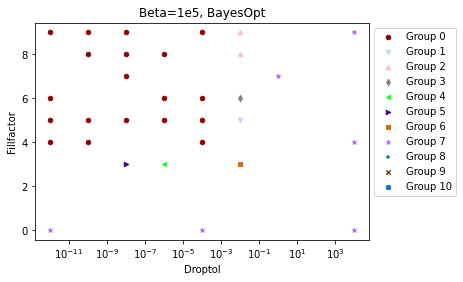

In [47]:
ax = PredictionGroup0.plot(kind='scatter', x='Droptol', y='Fillfactor',color='#920000', label='Group 0');
PredictionGroup1.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "v", color='#b6dbff', label='Group 1', ax=ax);
if clustercount>2:
    PredictionGroup2.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "^", color='#ffb6db', label='Group 2', ax=ax);
    if clustercount>3:
        PredictionGroup3.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "d",color='grey', label='Group 3', ax=ax);
        if clustercount>4:
            PredictionGroup4.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "<",color='#24ff24', label='Group 4', ax=ax);
            if clustercount>5:
                PredictionGroup5.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= ">",color='#490092', label='Group 5', ax=ax);
                if clustercount>6:
                    PredictionGroup6.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "s",color='#db6d00', label='Group 6', ax=ax);
                    if clustercount>7:
                        PredictionGroup7.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "*",color='#b66dff', label='Group 7', ax=ax);
                        if clustercount>8:
                            PredictionGroup8.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "+",color='#009292', label='Group 8', ax=ax);
                            if clustercount>9:
                                PredictionGroup9.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "x", color='#924900', label='Group 9', ax=ax);
                                if clustercount>10:
                                    PredictionGroup10.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "X",color='#006ddb', label='Group 10', ax=ax);
                                    if clustercount>11:
                                        PredictionGroup11.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "D",color='#004949', label='Group 11', ax=ax);
#tobedetermined.plot(kind='scatter', x='Droptol', y='Fillfactor',marker='o', color='none', edgecolors='black', label='tobedetermined', ax=ax);
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.title(f"Beta=1e{int(math.log10(beta))}, BayesOpt")
plt.show()